In [16]:
# Development use only:
import sys
sys.path.insert(0, '/home/cameron/Projects/hypso-package/hypso/')

from hypso import Hypso1, Hypso2
import os
import matplotlib.pyplot as plt

In [17]:
dir_path = '/home/cameron/Nedlastinger'

# HYPSO-1 Capture
h1_l1a_nc_file = os.path.join(dir_path, 'mvco_2025-01-13T14-57-34Z-l1a.nc')
h1_points_file = os.path.join(dir_path, 'mvco_2025-01-13T14-57-34Z-l1a.points')

# HYPSO-2 Capture
h2_l1a_nc_file = os.path.join(dir_path, 'mvco_2025-01-08T15-59-40Z-l1a.nc')

In [18]:
# Load HYPSO-1 Capture
satobj_h1 = Hypso1(path=h1_l1a_nc_file, verbose=True)

[INFO] Loading L1a capture mvco_2025-01-13T14-57-34Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide


In [19]:
# Run direct georeferencing using ADCS information
satobj_h1.run_direct_georeferencing()

[INFO] Running direct georeferencing...
[INFO] ADCS samples: 430
[INFO] ADCS time range: 1736779560.000000 to 1736780520.000000
[INFO] Frame time range: 1736780254.249422 to 1736780303.999422
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [ ]:
import xarray as xr
import numpy as np
from pyproj import Proj
from pyresample import geometry
from pyresample.geometry import AreaDefinition
from pyresample.geometry import SwathDefinition

def generate_swath_def(latitudes: np.ndarray, 
                       longitudes: np.ndarray, 
                       ) -> SwathDefinition:

    swath_def = SwathDefinition(lons=longitudes, lats=latitudes)

    return swath_def



def generate_hypso_swath_def(satobj,
                            use_indirect_georef: bool = False
                            ) -> SwathDefinition:

    dims = satobj.dim_names_2d

    if use_indirect_georef:
        latitudes = satobj.latitudes_indirect
        longitudes = satobj.longitudes_indirect
        resolution = satobj.resolution_indirect
    else:
        latitudes = satobj.latitudes
        longitudes = satobj.longitudes
        resolution = satobj.resolution

    attrs = {'resolution': resolution,
             'sensor': satobj.sensor,
             'name': 'swath'
             }

    latitudes_xr = xr.DataArray(latitudes, dims=dims, attrs=attrs)
    longitudes_xr = xr.DataArray(longitudes, dims=dims, attrs=attrs)

    swath_def = SwathDefinition(lons=longitudes_xr, lats=latitudes_xr)


    return swath_def


In [49]:
swath_def = generate_hypso_swath_def(satobj=satobj_h1)



In [50]:
swath_def

Shape: (598, 1092)
Lons: <xarray.DataArray (y: 598, x: 1092)> Size: 5MB
array([[-69.76252812, -69.76320903, -69.76388998, ..., -70.52778862,
        -70.52851438, -70.52924018],
       [-69.76419088, -69.76487173, -69.76555263, ..., -70.52939044,
        -70.53011614, -70.53084189],
       [-69.76585463, -69.76653543, -69.76721627, ..., -70.53099344,
        -70.53171908, -70.53244478],
       ...,
       [-70.64892759, -70.64957679, -70.65022603, ..., -71.37836283,
        -71.37905444, -71.37974609],
       [-70.65029797, -70.65094712, -70.6515963 , ..., -71.37967135,
        -71.3803629 , -71.38105449],
       [-70.65166828, -70.65231738, -70.65296651, ..., -71.38097991,
        -71.3816714 , -71.38236293]], shape=(598, 1092))
Dimensions without coordinates: y, x
Attributes:
    resolution:  598.2078451231815
    sensor:      hypso1_hsi
    name:        swath
Lats: <xarray.DataArray (y: 598, x: 1092)> Size: 5MB
array([[42.96837411, 42.9684772 , 42.96858029, ..., 43.08203985,
        43.08214557, 43.08225129],
       [42.96306266, 42.96316574, 42.96326882, ..., 43.07672053,
        43.07682624, 43.07693196],
       [42.95775136, 42.95785443, 42.9579575 , ..., 43.07140141,
        43.07150712, 43.07161283],
       ...,
       [39.83250765, 39.83260716, 39.83270667, ..., 39.9424211 ,
        39.94252352, 39.94262594],
       [39.82718148, 39.82728098, 39.82738048, ..., 39.93708492,
        39.93718733, 39.93728974],
       [39.82185542, 39.82195491, 39.8220544 , ..., 39.93174887,
        39.93185127, 39.93195367]], shape=(598, 1092))
Dimensions without coordinates: y, x
Attributes:
    resolution:  598.2078451231815
    sensor:      hypso1_hsi
    name:        swath

In [53]:
swath_def.lats

<xarray.DataArray (y: 598, x: 1092)> Size: 5MB
array([[42.96837411, 42.9684772 , 42.96858029, ..., 43.08203985,
        43.08214557, 43.08225129],
       [42.96306266, 42.96316574, 42.96326882, ..., 43.07672053,
        43.07682624, 43.07693196],
       [42.95775136, 42.95785443, 42.9579575 , ..., 43.07140141,
        43.07150712, 43.07161283],
       ...,
       [39.83250765, 39.83260716, 39.83270667, ..., 39.9424211 ,
        39.94252352, 39.94262594],
       [39.82718148, 39.82728098, 39.82738048, ..., 39.93708492,
        39.93718733, 39.93728974],
       [39.82185542, 39.82195491, 39.8220544 , ..., 39.93174887,
        39.93185127, 39.93195367]], shape=(598, 1092))
Dimensions without coordinates: y, x
Attributes:
    resolution:  598.2078451231815
    sensor:      hypso1_hsi
    name:        swath

In [ ]:
import os
import numpy as np
import xarray as xr
from pathlib import Path

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold



def generate_plsr_chl_estimates(satobj, model: Path):

    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    X = satobj.masked_l1d_cube


    return None

In [ ]:
import pickle

model_path = "/home/cameron/Nextcloud/School/IGARSS/dataset_results/pls_model_linear_16.pkl"




/home/cameron/Projects/hypso-package/demo/.venv/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PLSRegression from version 1.4.1.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
model

PLSRegression(n_components=16)

In [4]:
satobj_h1.products['chl'] = 3

doing stuff
[ERROR] Value must be a numpy ndarray or xarray DataArray.


In [7]:
satobj_h1.products['chl'] = satobj_h1.l1a_cube[:,:,40]

doing stuff


In [19]:
satobj_h1.products['chl']

<xarray.DataArray (y: 598, x: 546, band: 2)> Size: 5MB
array([[[ 5842.,  5733.],
        [ 6002.,  5914.],
        [ 6002.,  5929.],
        ...,
        [ 5144.,  5005.],
        [ 5084.,  4936.],
        [ 5094.,  4965.]],

       [[ 5839.,  5712.],
        [ 6058.,  5918.],
        [ 6001.,  5972.],
        ...,
        [ 5161.,  4999.],
        [ 5137.,  4907.],
        [ 5091.,  4988.]],

       [[ 5854.,  5765.],
        [ 6027.,  5983.],
        [ 6026.,  5923.],
        ...,
...
        ...,
        [34553., 34225.],
        [33741., 33552.],
        [34487., 34317.]],

       [[31119., 31145.],
        [32065., 32147.],
        [31148., 31477.],
        ...,
        [36634., 36377.],
        [35459., 35033.],
        [34587., 34162.]],

       [[30576., 30617.],
        [31343., 31804.],
        [28291., 28713.],
        ...,
        [36855., 36855.],
        [35343., 34993.],
        [34333., 33947.]]], shape=(598, 546, 2))
Coordinates:
  * y        (y) int64 5kB 0 1 2 3 4 5 6 7 8 ... 590 591 592 593 594 595 596 597
  * x        (x) int64 4kB 1091 1089 1087 1085 1083 1081 1079 ... 11 9 7 5 3 1
  * band     (band) int64 16B 40 41
Attributes:
    level:        L1a
    units:        counts
    description:  Digital Number (DN)

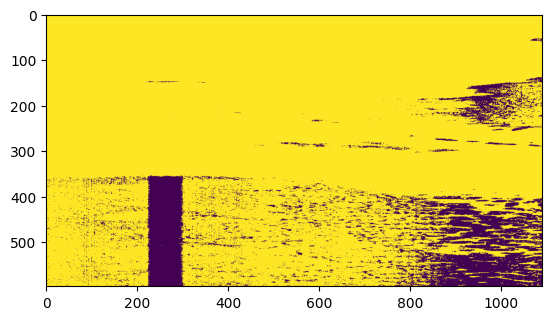

In [6]:
from hypso.classification.jonas_svm_classifier import *

file_name = os.path.join(dir_path, 'labels.bin')

mask = decode_jonas_svm_cloud_mask(file_path=file_name, spatial_dimensions=satobj_h1.spatial_dimensions)
plt.imshow(mask)

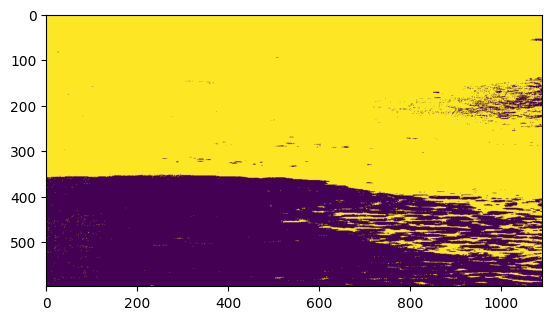

In [7]:
from hypso.classification.jon_cnn_classifier import *

file_name = os.path.join(dir_path, 'jon-cnn.labels')
mask = decode_jon_cnn_cloud_mask(file_path=file_name, spatial_dimensions=satobj_h1.spatial_dimensions)

plt.imshow(mask)

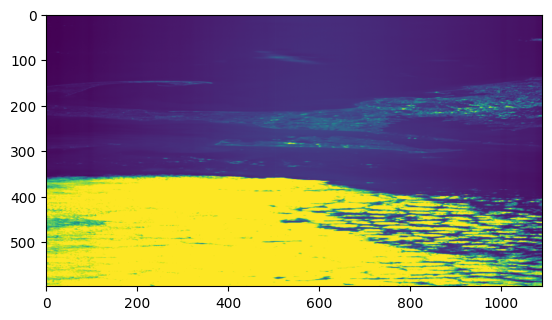

In [8]:
plt.imshow(satobj_h1.masked_l1a_cube[:,:,40])

In [38]:
output_xr = satobj_h1.masked_l1a_cube.where(satobj_h1.land_mask, other=0)


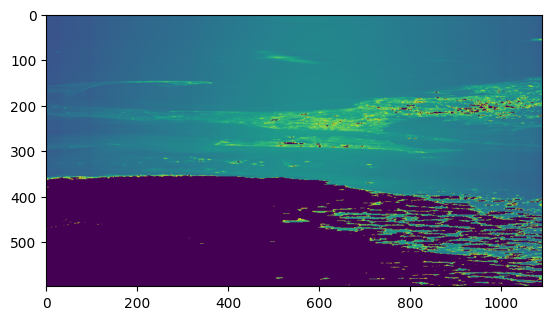

In [39]:
plt.imshow(output_xr[:,:,40])

In [4]:
# Load HYPSO-2 Capture
satobj_h2 = Hypso2(path=h1_l1a_nc_file, verbose=True)

[INFO] Loading L1a capture mvco_2025-01-13T14-57-34Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide


In [5]:
# Run direct georeferencing using ADCS information
satobj_h1.run_direct_georeferencing()

[INFO] Running direct georeferencing...
[INFO] ADCS samples: 430
[INFO] ADCS time range: 1736779560.000000 to 1736780520.000000
[INFO] Frame time range: 1736780254.249422 to 1736780303.999422
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [6]:
# Run indirect georeferencing using provided ground control points
satobj_h1.run_indirect_georeferencing(points_file_path=h1_points_file)

[INFO] Running indirect georeferencing...
No image mode provided. Detected image mode: bin3
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [7]:
# Generate L1b TOA radiance product
satobj_h1.generate_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...
[INFO] Running spectral correction...


In [8]:
# Generate L1c geolocated TOA radiance product
satobj_h1.generate_l1c_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...
[INFO] Running spectral correction...
[INFO] Running direct georeferencing...
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [9]:
# Generate L1d TOA reflectance product
satobj_h1.generate_l1d_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...
[INFO] Running spectral correction...
[INFO] Running direct georeferencing...
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 19N EPSG: 32619
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


In [10]:
from hypso.write import write_l1b_nc_file, write_l1c_nc_file, write_l1d_nc_file

# Write the generated products to NetCDF. Use the 'datacube=False' argument to write each band as a separate variable in the NetCDF file 
write_l1b_nc_file(satobj=satobj_h1, overwrite=True)
write_l1c_nc_file(satobj=satobj_h1, overwrite=True, datacube=False)
write_l1d_nc_file(satobj=satobj_h1, overwrite=True, datacube=False)

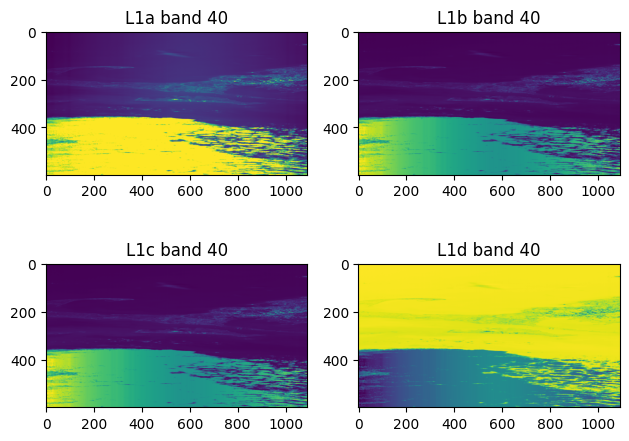

In [11]:
# Access datacubes
l1a_cube = satobj_h1.l1a_cube
l1b_cube = satobj_h1.l1b_cube
l1c_cube = satobj_h1.l1c_cube
l1d_cube = satobj_h1.l1d_cube

band = 40

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# Plot data on each subplot
axs[0, 0].imshow(l1a_cube[:,:,band])
axs[0, 0].set_title('L1a band ' + str(band))

axs[0, 1].imshow(l1b_cube[:,:,band])
axs[0, 1].set_title('L1b band ' + str(band))

axs[1, 0].imshow(l1c_cube[:,:,band])
axs[1, 0].set_title('L1c band ' + str(band))

axs[1, 1].imshow(l1d_cube[:,:,band])
axs[1, 1].set_title('L1d band ' + str(band))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()



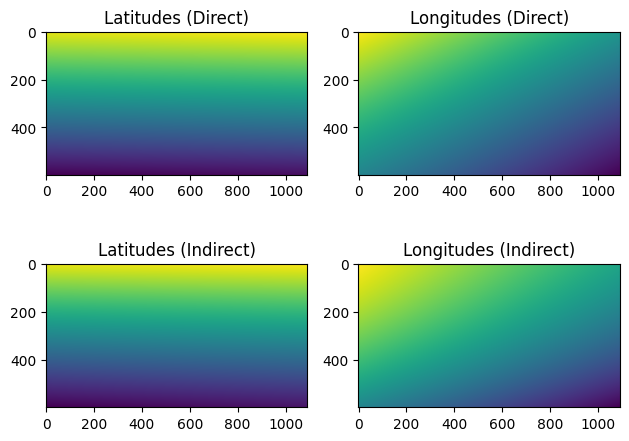

In [12]:
# Access latitudes and longitudes
latitudes = satobj_h1.latitudes
longitudes = satobj_h1.longitudes
latitudes_indirect = satobj_h1.latitudes_indirect
longitudes_indirect = satobj_h1.longitudes_indirect

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# Plot data on each subplot
axs[0, 0].imshow(latitudes)
axs[0, 0].set_title('Latitudes (Direct)')

axs[0, 1].imshow(longitudes)
axs[0, 1].set_title('Longitudes (Direct)')

axs[1, 0].imshow(latitudes_indirect)
axs[1, 0].set_title('Latitudes (Indirect)')

axs[1, 1].imshow(longitudes_indirect)
axs[1, 1].set_title('Longitudes (Indirect)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
from hypso.spectral_analysis import get_closest_wavelength_index

# Get wavelengths of capture
satobj_h1.wavelengths

# Get band index of wavelength
red_wl = 630
green_wl = 550
blue_wl = 480

print(get_closest_wavelength_index(satobj_h1, red_wl))
print(get_closest_wavelength_index(satobj_h1, green_wl))
print(get_closest_wavelength_index(satobj_h1, blue_wl))

69
46
26


In [14]:
# Get bounding box of capture
satobj_h1.bbox

(-71.38236292748121, 39.821855419463105, -69.76252811919608, 43.08225129043765)

In [15]:
from hypso.geometry_definition import generate_area_def

new_bbox = (-71.5, 39.8, -69, 43.1)

area_def = generate_area_def(area_id = 'New area',
                            proj_id = 'id',
                            description = 'new area',
                            bbox = new_bbox,
                            height = 512,
                            width = 512
                            )

# Display area information
area_def

Area ID: New area
Description: id
Projection ID: new area
Projection: {'ellps': 'bessel', 'lat_0': '90', 'lat_ts': '41.45', 'lon_0': '-70.25', 'no_defs': 'None', 'proj': 'stere', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 512
Number of rows: 512
Area extent: (-108452.5312, -4970309.1364, 100457.2277, -4603889.5646)

/home/cameron/Projects/hypso-package/demo/.venv/lib/python3.12/site-packages/hypso/resample/resamplers.py:90: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = kdtn.resample(data=data[:,:,band], fill_value=np.nan, radius_of_influence=radius_of_influence)
/home/cameron/Projects/hypso-package/demo/.venv/lib/python3.12/site-packages/hypso/resample/resamplers.py:90: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = kdtn.resample(data=data[:,:,band], fill_value=np.nan, radiu

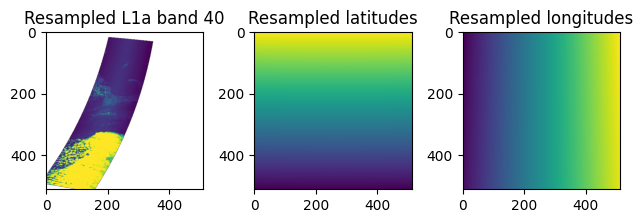

In [16]:
from hypso.resample import resample_l1a_cube, \
                            resample_l1b_cube, \
                            resample_l1c_cube, \
                            resample_l1d_cube

# Resample L1a cube
resampled_l1a_cube, \
resampled_latitudes, \
resampled_longitudes = resample_l1a_cube(satobj = satobj_h1,
                    area_def=area_def,
                    use_indirect_georef=True)

longitudes, latitudes = area_def.get_lonlats()

band = 40

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3)

# Plot data on each subplot
axs[0].imshow(resampled_l1a_cube[:,:,band])
axs[0].set_title('Resampled L1a band ' + str(band))

axs[1].imshow(resampled_latitudes)
axs[1].set_title('Resampled latitudes')

axs[2].imshow(resampled_longitudes)
axs[2].set_title('Resampled longitudes')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
from hypso.resample import resample_dataarray_bilinear, resample_dataarray_kd_tree_nearest

# Resampling functions can also be called directly. You can pass any data as an xarray to be resampled.

# Kd tree nearest resampling (recommended for hyperspectral data)
resampled_l1a_cube_kdtree = resample_dataarray_kd_tree_nearest(area_def = area_def, 
                                        data = satobj_h1.l1a_cube,
                                        latitudes = satobj_h1.latitudes,
                                        longitudes = satobj_h1.longitudes,
                                        radius_of_influence=satobj_h1.resolution)


# Bilinear resampling
resampled_l1a_cube_bilinear = output = resample_dataarray_bilinear(area_def = area_def, 
                                        data = satobj_h1.l1a_cube,
                                        latitudes = satobj_h1.latitudes,
                                        longitudes = satobj_h1.longitudes,
                                        )



/home/cameron/Projects/hypso-package/demo/.venv/lib/python3.12/site-packages/hypso/resample/resamplers.py:90: PerformanceWarning: KDTreeNearestXarrayResampler uses a dask-based implementation, but a pure numpy array was provided. Data will be converted to dask arrays for computation and then converted back. To avoid this warning convert your numpy array before providing it to the resampler.
  resampled_data[:,:,band] = kdtn.resample(data=data[:,:,band], fill_value=np.nan, radius_of_influence=radius_of_influence)
/home/cameron/Projects/hypso-package/demo/.venv/lib/python3.12/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [19]:
from hypso.satpy import get_l1a_satpy_scene, \
                        get_l1b_satpy_scene, \
                        get_l1c_satpy_scene, \
                        get_l1d_satpy_scene

# Export HYPSO capture as a SatPy scene
scene = get_l1a_satpy_scene(satobj=satobj_h1, use_indirect_georef=False)

#scene.show('band_40')